# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2


# Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=east london
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=ushuaia
Processing Record 3 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=punta arenas
Processing Record 4 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=flinders
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=rikitea
Processing Record 6 | Ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=ilo
Processing Record 7 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 56 | Dvorichna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=dvorichna
Processing Record 57 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=talcahuano
Processing Record 58 | Iberia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=iberia
Processing Record 59 | Nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=nichinan
City not found. Skipping...
Processing Record 60 | Kinkala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=kinkala
Processing Record 61 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=provideniya
Processing Record 62 | Athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0

Processing Record 112 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=saint-philippe
Processing Record 113 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=kruisfontein
Processing Record 114 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=egvekinot
Processing Record 115 | Sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=sorland
Processing Record 116 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=te anau
Processing Record 117 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=chokurdakh
Processing Record 118 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001

Processing Record 167 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=bambous virieux
Processing Record 168 | San Ramon de la Nueva Oran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=san ramon de la nueva oran
Processing Record 169 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=broome
Processing Record 170 | Manakara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=manakara
Processing Record 171 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=dikson
Processing Record 172 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=kununurra
Processing Record 173 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 222 | Mataram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=mataram
Processing Record 223 | Bang Saphan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=bang saphan
Processing Record 224 | La Palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=la palma
Processing Record 225 | Ligayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=ligayan
Processing Record 226 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=mareeba
Processing Record 227 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=kavieng
Processing Record 228 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&

Processing Record 278 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=baykit
Processing Record 279 | Teahupoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=teahupoo
City not found. Skipping...
Processing Record 280 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=cidreira
Processing Record 281 | Zlobin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=zlobin
Processing Record 282 | Thaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=thaton
Processing Record 283 | Khilok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=khilok
Processing Record 284 | Tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd

Processing Record 334 | Mayskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=mayskiy
Processing Record 335 | Vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=vanavara
Processing Record 336 | Ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=ibra
Processing Record 337 | Zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=zaysan
Processing Record 338 | Santa Cruz de la Palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=santa cruz de la palma
Processing Record 339 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=lavrentiya
Processing Record 340 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b1

Processing Record 390 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=mehamn
Processing Record 391 | Pleshanovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=pleshanovo
Processing Record 392 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=umm lajj
Processing Record 393 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=ambilobe
Processing Record 394 | Desaguadero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=desaguadero
City not found. Skipping...
Processing Record 395 | Gorom-Gorom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=gorom-gorom
Processing Record 396 | Mumford
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 445 | Mersin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=mersin
Processing Record 446 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=tilichiki
Processing Record 447 | Hushitai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=hushitai
Processing Record 448 | Shellbrook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=shellbrook
Processing Record 449 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=nouadhibou
Processing Record 450 | Srivardhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=srivardhan
Processing Record 451 | Chaohu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd18

Processing Record 501 | Shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=shubarkuduk
Processing Record 502 | Hit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=hit
City not found. Skipping...
Processing Record 503 | Griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=griffith
Processing Record 504 | Tynaarlo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=tynaarlo
Processing Record 505 | Cabo Rojo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=cabo rojo
Processing Record 506 | Okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b138529b32cd188864caa92b2&q=okha
Processing Record 507 | Aginskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=001b833b13

In [5]:
len(city_name)

536

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,90,ZA,1559790160,67,-33.02,27.91,48.20,3.89
1,Ushuaia,0,AR,1559790011,87,-54.81,-68.31,42.80,17.22
2,Punta Arenas,75,CL,1559790162,73,-53.16,-70.91,39.20,17.22
3,Flinders,0,AU,1559790163,36,-34.58,150.85,64.99,4.70
4,Rikitea,100,PF,1559790164,85,-23.12,-134.97,77.00,13.69


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

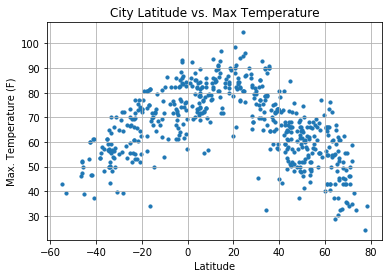

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

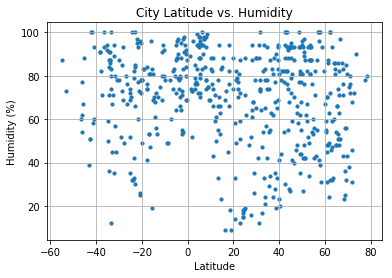

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

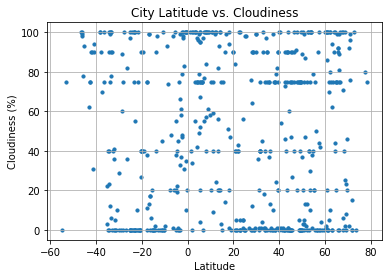

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

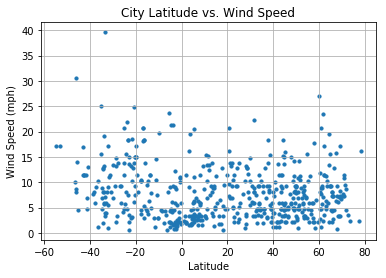

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()